In [1]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


### Load Dataset
MNIST dataset

source: http://yann.lecun.com/exdb/mnist/

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 9s 1us/step


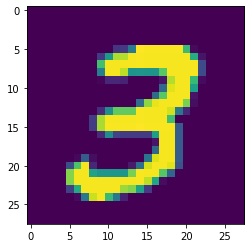

Label:  3


In [3]:
# show first number in the dataset
plt.imshow(X_train[7])    
plt.show()
print('Label: ', y_train[7])

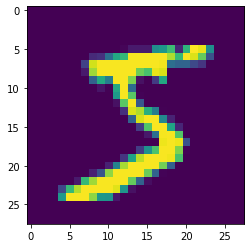

Label:  5


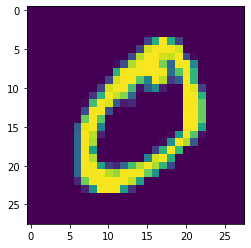

Label:  0


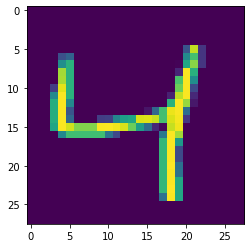

Label:  4


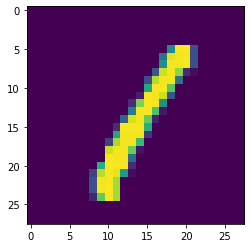

Label:  1


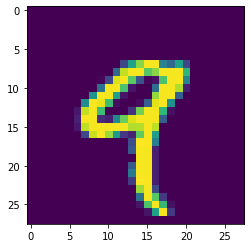

Label:  9


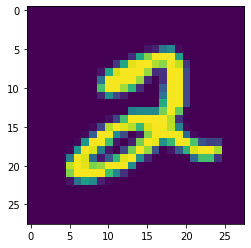

Label:  2


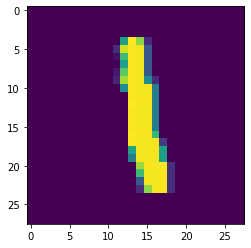

Label:  1


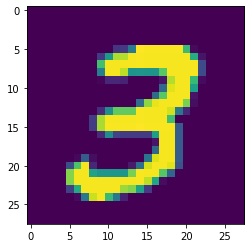

Label:  3


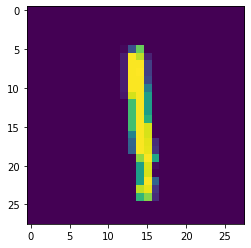

Label:  1


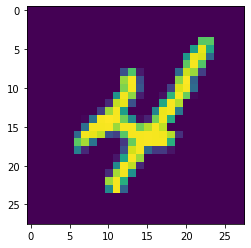

Label:  4


In [4]:
for i in range(0,10):
    plt.imshow(X_train[i])    # show first number in the dataset
    plt.show()
    print('Label: ', y_train[i])

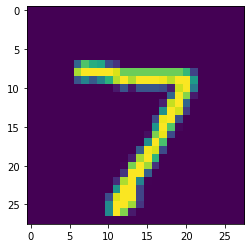

Label:  7


In [5]:
# show first number in the dataset
plt.imshow(X_test[0])    
plt.show()
print('Label: ', y_test[0])

In [6]:
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [7]:
# use only 33% of training data to expedite the training process
X_train, _ , y_train, _ = train_test_split(X_train, y_train, test_size = 0.67, random_state = 7)

In [8]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19800, 784) (10000, 784) (19800, 10) (10000, 10)


### Basic Multilayered perceptron Model

In [10]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

In [11]:
model = Sequential()

In [12]:
model.add(Dense(50, input_shape = (784, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [13]:
sgd = optimizers.SGD(lr = 0.001)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [14]:
history = model.fit(X_train, y_train, batch_size = 256, validation_split = 0.3, epochs = 100, verbose = 0)

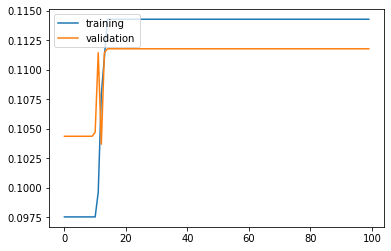

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [17]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 32us/step


In [18]:
print('Test accuracy: ', results[1])

Test accuracy:  0.11349999904632568


### 1. Weight Initialization

- Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem up to some degree

- He normal or Xavier normal initialization schemes are SOTA at the moment

- Doc: https://keras.io/initializers/

In [19]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [20]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

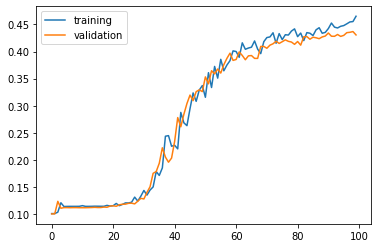

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [23]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 35us/step


In [24]:
print('Test accuracy: ', results[1])

Test accuracy:  0.4388999938964844


### 2. Nonlinearity (Activation function)
- Sigmoid functions suffer from gradient vanishing problem, making training slower
- There are many choices apart from sigmoid and tanh; try many of them!
- 'relu' (rectified linear unit) is one of the most popular ones
- 'selu' (scaled exponential linear unit) is one of the most recent ones
- Doc: https://keras.io/activations/

In [25]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [26]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

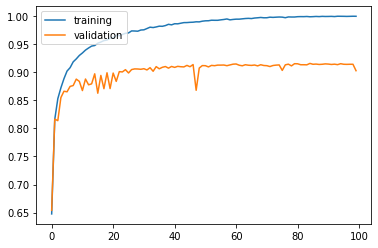

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [29]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 36us/step


In [30]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9047999978065491


### 3. Optimizers
- Many variants of SGD are proposed and employed nowadays
- One of the most popular ones are Adam (Adaptive Moment Estimation)
- Doc: https://keras.io/optimizers/


In [32]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(Activation('elu'))  
    model.add(Dense(50))
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)                     # use Adam optimizer
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [33]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

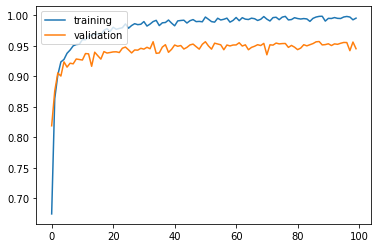

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [35]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 38us/step


In [36]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9485999941825867


### 4. Batch Normalization
- Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective
- Normalize each mini-batch before nonlinearity
- Doc: https://keras.io/optimizers/

In [37]:
from keras.layers import BatchNormalization

Batch normalization layer is usually inserted after dense/convolution and before nonlinearity

In [39]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [40]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

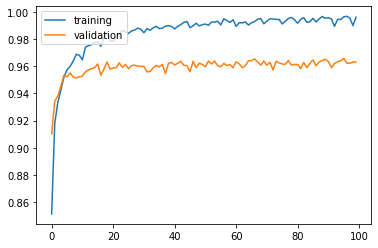

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [42]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 51us/step


In [43]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9646999835968018


### 5. Dropout (Regularization)
- Dropout is one of powerful ways to prevent overfitting
- The idea is simple. It is disconnecting some (randomly selected) neurons in each layer
- The probability of each neuron to be disconnected, namely 'Dropout rate', has to be designated
- Doc: https://keras.io/layers/core/#dropout

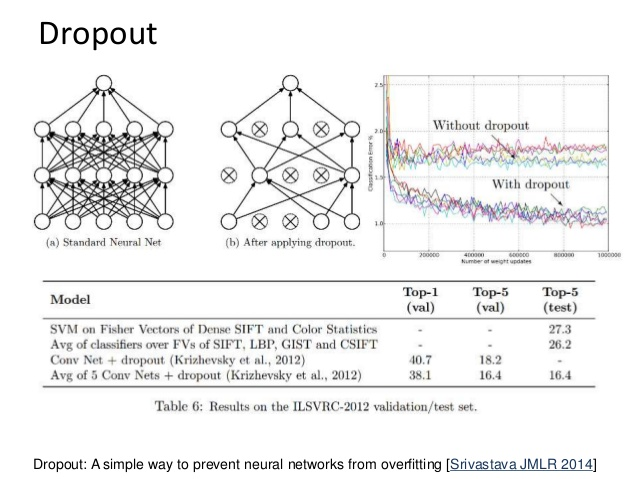

In [44]:
from keras.layers import Dropout

In [45]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('elu'))    
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('elu'))
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('elu'))    
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('elu'))    
    model.add(Dropout(0.2))                         # Dropout layer after Activation
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [46]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

Train on 13860 samples, validate on 5940 samples
Epoch 1/100
13860/13860 [==============================] - 3s 182us/step - loss: 4.4824 - accuracy: 0.2082 - val_loss: 1.6096 - val_accuracy: 0.4042
Epoch 2/100
13860/13860 [==============================] - 2s 139us/step - loss: 1.8044 - accuracy: 0.3518 - val_loss: 1.4506 - val_accuracy: 0.4372
Epoch 3/100
13860/13860 [==============================] - 2s 128us/step - loss: 1.6287 - accuracy: 0.4079 - val_loss: 1.2965 - val_accuracy: 0.4992
Epoch 4/100
13860/13860 [==============================] - 2s 127us/step - loss: 1.4598 - accuracy: 0.4719 - val_loss: 1.0790 - val_accuracy: 0.5899
Epoch 5/100
13860/13860 [==============================] - 2s 114us/step - loss: 1.2993 - accuracy: 0.5317 - val_loss: 1.0151 - val_accuracy: 0.6236
Epoch 6/100
13860/13860 [==============================] - 2s 113us/step - loss: 1.2129 - accuracy: 0.5548 - val_loss: 0.8705 - val_accuracy: 0.6416
Epoch 7/100
13860/13860 [==============================] 

13860/13860 [==============================] - 2s 119us/step - loss: 0.3586 - accuracy: 0.8928 - val_loss: 0.3088 - val_accuracy: 0.9296
Epoch 56/100
13860/13860 [==============================] - 2s 119us/step - loss: 0.3512 - accuracy: 0.8935 - val_loss: 0.3041 - val_accuracy: 0.9310
Epoch 57/100
13860/13860 [==============================] - 2s 121us/step - loss: 0.3384 - accuracy: 0.8957 - val_loss: 0.3209 - val_accuracy: 0.9323
Epoch 58/100
13860/13860 [==============================] - 2s 127us/step - loss: 0.3500 - accuracy: 0.8921 - val_loss: 0.2764 - val_accuracy: 0.9325
Epoch 59/100
13860/13860 [==============================] - 2s 137us/step - loss: 0.3519 - accuracy: 0.8929 - val_loss: 0.3248 - val_accuracy: 0.9215
Epoch 60/100
13860/13860 [==============================] - 2s 132us/step - loss: 0.3388 - accuracy: 0.8963 - val_loss: 0.3040 - val_accuracy: 0.9303
Epoch 61/100
13860/13860 [==============================] - 2s 169us/step - loss: 0.3236 - accuracy: 0.9006 - val

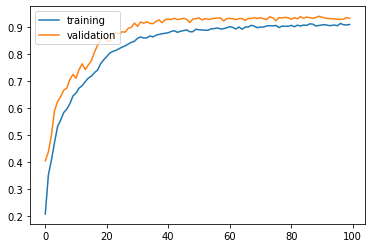

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Validation results does not improve since it did not show signs of overfitting, yet.
Hence, the key takeaway message is that apply dropout when you see a signal of overfitting.

In [48]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 46us/step


In [49]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9304999709129333


### 6. Model Ensemble
- Model ensemble is a reliable and promising way to boost performance of the model
- Usually create 8 to 10 independent networks and merge their results
- Here, we resort to scikit-learn API, VotingClassifier
- Doc: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html


In [51]:
import numpy as np

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [52]:
y_train = np.argmax(y_train, axis = 1)
y_test = np.argmax(y_test, axis = 1)

In [53]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [54]:
model1 = KerasClassifier(build_fn = mlp_model, epochs = 30, verbose = 0)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 10, verbose = 0)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 20, verbose = 0)

In [55]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3)], voting = 'soft')

In [56]:
ensemble_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('model1',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F5A375EE10>),
                             ('model2',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F5A375EDD8>),
                             ('model3',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F5A375EEB8>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [57]:
y_pred = ensemble_clf.predict(X_test)

In [58]:
print('Test accuracy:', accuracy_score(y_pred, y_test))

Test accuracy: 0.9629
